# Regularization
### Carlos Marcelo Barrera Nolasco
### 101893

In [1]:
import pandas as pd
import numpy as np
from __future__ import division
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)

## Funciones de ayuda

In [2]:
def calcError(X,Y,W):
    return np.mean((np.transpose(Y)[0] - X.dot(W))**2)

In [3]:
def addX0(X):
    ones = np.ones((len(X),1))
    X = np.append(ones, X, axis=1)
    return X

## Función SGD regularizada

In [4]:
def SGD_reg(X,Y,W,eta,lbda,iters):
    for j in range (0, iters):
        for i in range(0, len(X)):
            W_aux = W[0]+ eta*(Y[i][0]-(X[i].dot(W)))
            W_aux_2 = W[1:]+(eta*(Y[i][0]-(X[i].dot(W)))*X[i][1:])-lbda*W[1:]
            W = np.append(W_aux, W_aux_2)
    return W

## Leyendo los datos

In [5]:
df = pd.read_csv("../../Recursos/regLinPoli.csv")

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[[df.columns[-1]]], train_size=0.75)

In [8]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

## Estandarizando Datos

In [9]:
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

In [10]:
scaler_Y = preprocessing.StandardScaler().fit(Y_train)
Y_train = scaler_Y.transform(Y_train)
Y_test = scaler_Y.transform(Y_test)

## Acondicionando datos (Añadir $X_0=1$)

In [11]:
X_test = addX0(X_test)
X_train = addX0(X_train)

## Entrenando el modelo para $\eta=0.05$ con $\lambda=0$ y $\lambda=0.001$

In [12]:
W_init = np.random.rand(len(X_train[0]))*100

In [13]:
W_lambda_0 = SGD_reg(X_train, Y_train, W_init, 0.05, 0, 3)
W_lambda_001 = SGD_reg(X_train, Y_train, W_init, 0.05, 0.001, 3)

## Comparando los errores para los distintos W

In [14]:
error_lambda_0 = calcError(X_test, Y_test, W_lambda_0)
error_lambda_001 = calcError(X_test, Y_test, W_lambda_001)

print error_lambda_0, error_lambda_001

0.00179665041464 0.00301597365703


## Gráfica del error cuadrático para varios valores de $\lambda$

In [15]:
lambdas = np.linspace(0, 0.1, 101)

In [16]:
errors = []
for lbda in lambdas:
    W_aux = SGD_reg(X_train, Y_train, W_init, 0.05, lbda, 3)
    errors.append(calcError(X_train, Y_train, W_aux))

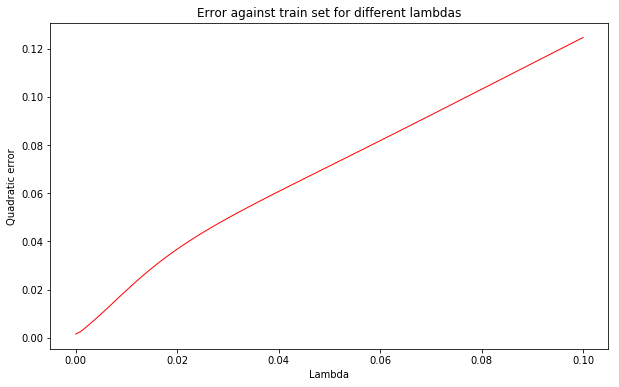

In [17]:
plt.plot(lambdas, errors, color='red', linewidth=1)
plt.title('Error against train set for different lambdas')
plt.xlabel('Lambda')
plt.ylabel('Quadratic error')

In [18]:
errors = []
for lbda in lambdas:
    W_aux = SGD_reg(X_test, Y_test, W_init, 0.05, lbda, 3)
    errors.append(calcError(X_test, Y_test, W_aux))

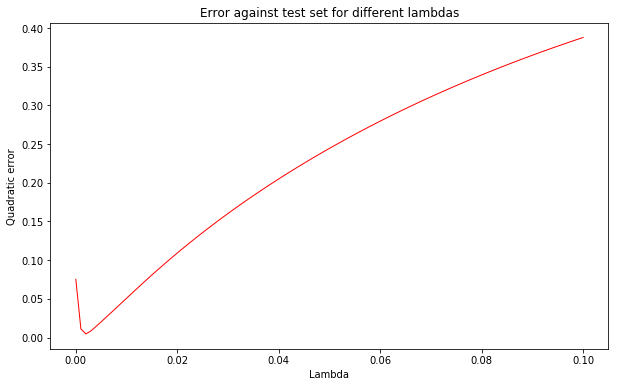

In [19]:
plt.plot(lambdas, errors, color='red', linewidth=1)
plt.title('Error against test set for different lambdas')
plt.xlabel('Lambda')
plt.ylabel('Quadratic error')

# Pruebas con el archivo regLinPoli2.csv

## Leyendo los datos

In [20]:
df_2 = pd.read_csv("../../Recursos/regLinPoli2.csv")

In [21]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(df_2[df_2.columns[0:-1]],df_2[[df_2.columns[-1]]], train_size=0.75)

In [22]:
X_train_2 = np.array(X_train_2)
Y_train_2 = np.array(Y_train_2)
X_test_2 = np.array(X_test_2)
Y_test_2 = np.array(Y_test_2)

## Estandarizando Datos

In [23]:
scaler_X_2 = preprocessing.StandardScaler().fit(X_train_2)
X_train_2 = scaler_X_2.transform(X_train_2)
X_test_2 = scaler_X_2.transform(X_test_2)

In [24]:
scaler_Y_2 = preprocessing.StandardScaler().fit(Y_train_2)
Y_train_2 = scaler_Y_2.transform(Y_train_2)
Y_test_2 = scaler_Y_2.transform(Y_test_2)

## Acondicionando datos (Añadir $X_0=1$)

In [25]:
X_test_2 = addX0(X_test_2)
X_train_2 = addX0(X_train_2)

## Entrenando el modelo para $\eta=0.05$ con $\lambda=0$ y $\lambda=0.001$

In [26]:
W_init_2 = np.random.rand(len(X_train_2[0]))*100

In [27]:
W_lambda_0_2 = SGD_reg(X_train_2, Y_train_2, W_init_2, 0.05, 0, 3)
W_lambda_001_2 = SGD_reg(X_train_2, Y_train_2, W_init_2, 0.05, 0.001, 3)

## Comparando los W

In [28]:
error_lambda_0_2 = calcError(X_test_2, Y_test_2, W_lambda_0_2)
error_lambda_001_2 = calcError(X_test_2, Y_test_2, W_lambda_001_2)

print error_lambda_0_2, error_lambda_001_2

824315.741534 10356.2761849


## Gráfica del error cuadrático para varios valores de $\lambda$

In [29]:
lambdas_2 = np.linspace(0, 0.5, 101)

In [30]:
errors_2 = []
for lbda in lambdas_2:
    W_aux = SGD_reg(X_train_2, Y_train_2, W_init_2, 0.05, lbda, 3)
    errors_2.append(calcError(X_train_2, Y_train_2, W_aux))

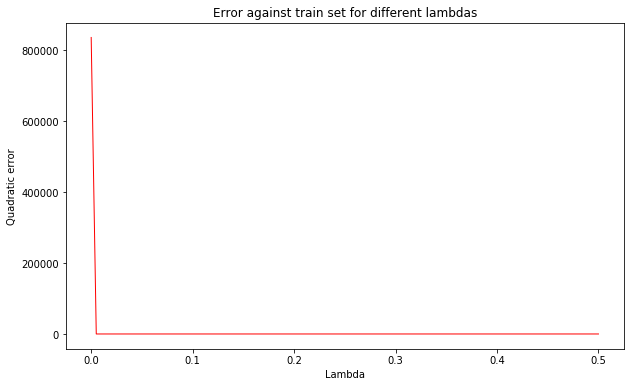

In [31]:
plt.plot(lambdas_2, errors_2, color='red', linewidth=1)
plt.title('Error against train set for different lambdas')
plt.xlabel('Lambda')
plt.ylabel('Quadratic error')

In [32]:
errors_2 = []
for lbda in lambdas_2:
    W_aux = SGD_reg(X_test_2, Y_test_2, W_init_2, 0.05, lbda, 3)
    errors_2.append(calcError(X_test_2, Y_test_2, W_aux))

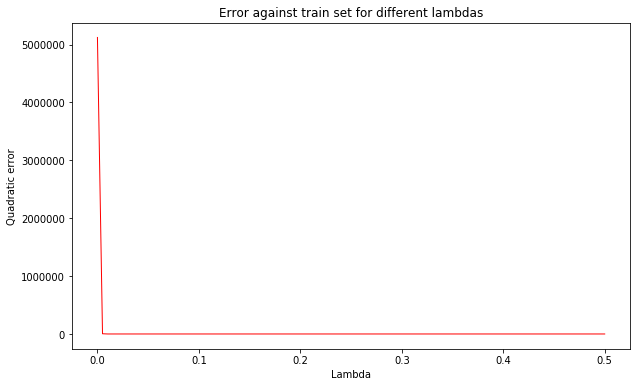

In [33]:
plt.plot(lambdas_2, errors_2, color='red', linewidth=1)
plt.title('Error against train set for different lambdas')
plt.xlabel('Lambda')
plt.ylabel('Quadratic error')

# Minibatch

## Leyendo los datos

In [38]:
df_3 = pd.read_csv("../../Recursos/regLin.csv")

In [39]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(df_3[["X"]],df_3[[df_3.columns[1]]], train_size=0.75)

In [40]:
X_train_3 = np.array(X_train_3)
Y_train_3 = np.array(Y_train_3)
X_test_3 = np.array(X_test_3)
Y_test_3 = np.array(Y_test_3)

## Función SGD minibatch

In [41]:
def SGD_minibatch(X,Y,eta,frame,iters):
    errors = []
    W = np.random.rand(len(X[0]))*100
    for j in range (0, iters):
        for i in range(0, int(np.ceil(len(X)/ frame))):
            idx = i*frame
            X_aux = np.mean(X[idx:idx+frame], axis=0)
            Y_aux = np.mean(Y[idx:idx+frame], axis=0)
            W = W+eta*(Y_aux[0]-(X_aux.dot(W)))*X_aux
            errors.append(calcError(X_aux,Y_aux,W))
    return W, errors

## Estandarizando datos

In [42]:
scaler_X_3 = preprocessing.StandardScaler().fit(X_train_3)
X_train_3=scaler_X_3.transform(X_train_3)

## Acondicionando datos (Añadir $X_0=1$)

In [44]:
X_train_3_ones = addX0(X_train_3)

## Entrenando el modelo con datos estandarizados ($\eta$ = 0.05, 5 iteraciones, batch size de 5)

In [49]:
W_final_3, errors_3 = SGD_minibatch(X_train_3_ones,Y_train_3,.05,5,5)

## Gráfica del error cuadrático para cada W encontrada

In [50]:
steps = []
for i in range (0, len(errors_3)):
    steps.append(i+1)

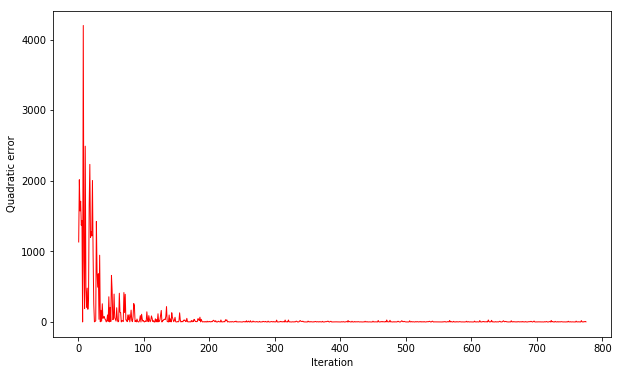

In [51]:
plt.plot(steps, errors_3, color='red', linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Quadratic error')

## Comparando los resultados con los obtenidos con SciKit Learn

In [53]:
linReg = LinearRegression()
linReg.fit(X_train_3,Y_train_3)
print linReg.intercept_,linReg.coef_
print W_final_3

[ 32.99430718] [[ 17.56421416]]
[ 33.37703993  17.55983765]
